Project : Twitter Sentiment Analysis

In [1]:
import tweepy 
from textblob import TextBlob 
# from wordcloud import WordCloud 
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

Twiiter API

In [2]:
import tweepy
import configparser
import pandas as pd
config = configparser.ConfigParser()

config.read('config.ini')
api_key = config['tweets']['api_key']
api_key_secret = config['tweets']['api_key_secret']

access_token = config['tweets']['access_token']
access_token_secret = config['tweets']['access_token_secret']

API Authentication

In [3]:
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()

# print(public_tweets[0].created_at)
print(public_tweets[0].user.screen_name)

ndtv


Extract Tweets From Twitter

In [4]:
posts = api.user_timeline(screen_name="RVCJ_FB", count=100, lang = "en" , tweet_mode = "extended")

#printing 5 recent tweets from this Account 

print("5 Recent Tweets : \n")
i =1
for tweet in posts[0:1]:
    print(str(i) +' ) ' + tweet.full_text + '\n')
    i+=1

Unexpected parameter: lang


5 Recent Tweets : 

1 ) Also Boys https://t.co/s5AIkHtk8Q



Creating a DataFrame for Tweets

In [5]:
#creating dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#printing first 5 tweets
# df.head()
df

,Tweets
0,Also Boys https://t.co/s5AIkHtk8Q
1,Incognito Mode https://t.co/59eVnX9Yrm
2,Kuch aur hi pose aa gaya.. https://t.co/iIJ3Gx...
3,TV Reporter https://t.co/fGw6DWUKD8
4,Nicholas Pooran https://t.co/41EgwiW3Et
...,...
95,Introvert People be like.. https://t.co/vnxpXO...
96,Sanju Samson\n#NZvIND #INDvsNZ https://t.co/25...
97,Most Followed Personalities https://t.co/oIdmJ...
98,Continue this.. https://t.co/8goPzyzuXv


Cleaning Text

In [6]:
#creating a function to clean tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # here we removed @ from tweets
    text = re.sub(r'#','',text)             # here we removed Hashtags from tweets
    text = re.sub(r'RT[\s]+','',text)       # here we removed ReTweets from tweets
    text = re.sub(r'https?:\/\/\S+','',text)       # here we removed Hyperlinks from tweets

    return text 

#Applying function to our Twwets

df['Tweets'] = df['Tweets'].apply(cleanTxt)

#printing Cleaned Text (Tweets)
df

,Tweets
0,Also Boys
1,Incognito Mode
2,Kuch aur hi pose aa gaya..
3,TV Reporter
4,Nicholas Pooran
...,...
95,Introvert People be like..
96,Sanju Samson\nNZvIND INDvsNZ
97,Most Followed Personalities
98,Continue this..


Creating a Function to get Subjectivity and Polarity

In [7]:
#function for getting subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#function for getting Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#creating two new Columns for the above 
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#printing DataFrame with new Columns
df.head()


,Tweets,Subjectivity,Polarity
0,Also Boys,0.0,0.0
1,Incognito Mode,0.0,0.0
2,Kuch aur hi pose aa gaya..,0.0,0.0
3,TV Reporter,0.0,0.0
4,Nicholas Pooran,0.0,0.0


Plot the Word Cloud

/Users/akashyadav/opt/anaconda3/bin/python


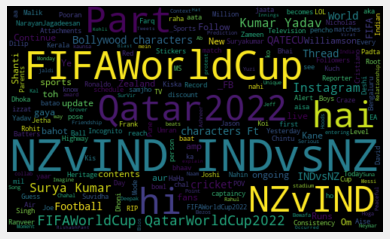

In [8]:
#Word Cloud
import sys
print(sys.executable)
from wordcloud import WordCloud 
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud  = WordCloud(width=500, height=300 , random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Compute Tweets as Positive Negative and Neutral

In [9]:
#creating a function for this
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#creating New Column for Analysis
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#printing updated dataframe
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,Also Boys,0.0,0.0,Neutral
1,Incognito Mode,0.0,0.0,Neutral
2,Kuch aur hi pose aa gaya..,0.0,0.0,Neutral
3,TV Reporter,0.0,0.0,Neutral
4,Nicholas Pooran,0.0,0.0,Neutral


Printing all Positive Tweets

In [11]:
#printinf all Positive Tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]): # up to no. of columns
    if (sortedDF['Analysis'][i]== 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j+=1

1) Follow  for live update of ongoing FIFA World and more sports contents.. Thread 🧵

FIFAWorldCup Qatar2022 FIFAWorldCup2022 

2) Cristiano Ronaldo becomes the first person to reach 500 Million Followers on Instagram 

3) Follow _Sports for live update of ongoing FIFA World Cup and more sports contents.. Thread 🧵
FIFAWorldCup QatarWorldCup2022 

4) _FB: Peaceful Song 

5) Unique way to protest.. 

6) India beats New Zealand by 65 Runs
NZvIND INDvsNZ 

7) 192 Runs target for New Zealand 
NZvIND INDvsNZ 

8) My Timeline right now 
Messi𓃵 Ronaldo𓃵 CR7𓃵 

9) Most Followed Personalities 



Printing Negative Tweets

In [12]:
#Negative Tweeets
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
j = 1 
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i]== 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j+=1

1) Serious Relationship 



Ploting Polarity and Subjectivity

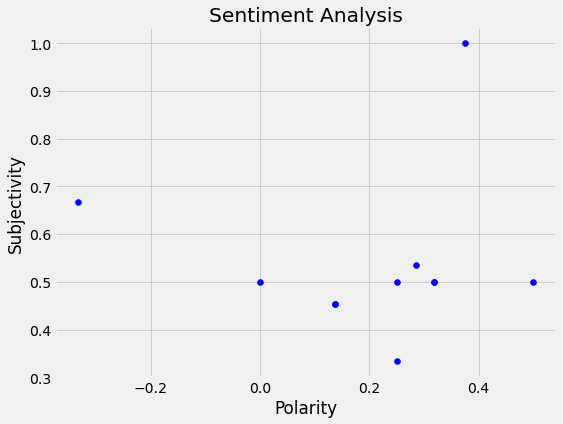

In [13]:
#ploting polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Getting Percentage of Positive Tweets

In [14]:
#Percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

#calculating Percentage
round((ptweets.shape[0]/df.shape[0])*100,2)

9.0

Getting Percentage of Negative Tweets

In [15]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

#calculating Percentage
round((ntweets.shape[0]/df.shape[0])*100,2)

1.0

Getting Percentage of Neutral Tweets

In [16]:
netweets = df[df.Analysis == 'Neutral']
netweets = netweets['Tweets']

#calculating Percentage
round((netweets.shape[0]/df.shape[0])*100,2)

90.0

Creating Plot

<function matplotlib.pyplot.show(close=None, block=None)>

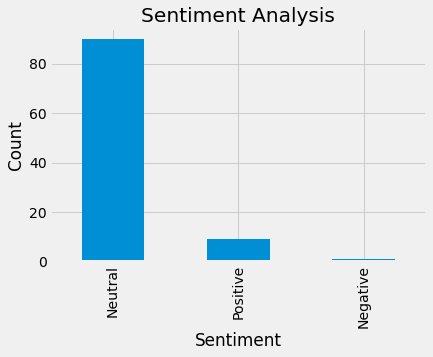

In [17]:
#show the value count
df['Analysis'].value_counts()

#plot and visualize value count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')

df['Analysis'].value_counts().plot(kind='bar')
plt.show